In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#gerekli kütüphaneler

In [2]:
ticaret=pd.read_csv("C:/Users/moonm/ÖzlemElmalı_222802002/Veri Toplama/model.csv")

In [3]:
ticaret.columns

Index(['Fiyat', 'Kullanım Amaç', 'Ekran Boyutu', 'Ekran Çözünürlüğü',
       'Ekran Hızı', 'RAM', 'SSD Kapasitesi', 'USB 3.0 Adet', 'USB-C Adet',
       'HDMI Var mı', 'Pil Gücü', 'Pil Hücre Sayısı', 'FreeDOS', 'Windows',
       'macOS', 'AMD', 'Apple', 'Intel', 'AMD Ryzen 5', 'AMD Ryzen 7',
       'Apple M2 Max', 'Intel Core i5', 'Intel Core i7', 'Intel Core i9',
       'Intel Xeon W'],
      dtype='object')

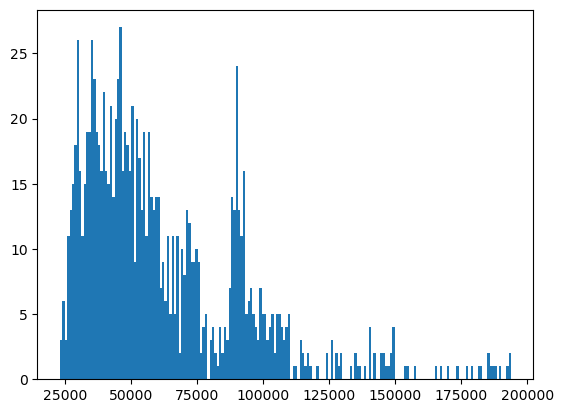

In [4]:
#sadece fiyat sütunun histogramik görüntüsünü inceliyoruz çünkü diğer bir çok sütun ya 0 ve 1 değerleri içeriyor ya da belirli sayısal değerler almak zorunda(144 Hz,256 GB vb.)
plt.figure()
plt.hist(ticaret['Fiyat'], bins=190)
plt.show()

In [5]:
#125000 lira üzerinde çok az değer olması ve denemeler sonucunda bu değerler olamdan algoritma daha iyi çalıştığı için 125000 üstü değerlerin satırları atılmıştır
ticaret = ticaret[ticaret['Fiyat'] <= 125000]
ticaret.shape

(1068, 25)

In [6]:
#Yine denenerek bu değerler varken ve yokken algoritma performansına bakılmış ve bu değerler olmadan daha yüksek performans alındığı için bu sütunlar atılmıştır
ticaret=ticaret.drop(["HDMI Var mı","Intel Xeon W"],axis=1)

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#feature selection ve koralasyon ile sütunların tekrar değerlendirilmesi
corr_matrix = ticaret.corr()

X = ticaret.drop('Fiyat', axis=1)
y = ticaret['Fiyat']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1) 
fit = rfe.fit(X, y)

selected_features = pd.Series(fit.ranking_, index=X.columns).sort_values()
print("Seçilen Öznitelikler:")
print(selected_features)
print(corr_matrix["Fiyat"].sort_values(ascending=False))

Seçilen Öznitelikler:
Intel Core i9         1
Intel Core i7         2
Intel                 3
Intel Core i5         4
Apple                 5
AMD                   6
AMD Ryzen 5           7
AMD Ryzen 7           8
macOS                 9
USB-C Adet           10
Apple M2 Max         11
Kullanım Amaç        12
Ekran Boyutu         13
Pil Hücre Sayısı     14
Windows              15
FreeDOS              16
Pil Gücü             17
USB 3.0 Adet         18
RAM                  19
Ekran Hızı           20
SSD Kapasitesi       21
Ekran Çözünürlüğü    22
dtype: int32
Fiyat                1.000000
Pil Gücü             0.655722
USB-C Adet           0.633006
Intel Core i9        0.417241
Ekran Çözünürlüğü    0.415730
Ekran Boyutu         0.395589
Pil Hücre Sayısı     0.360590
Ekran Hızı           0.300613
RAM                  0.293232
Windows              0.274290
SSD Kapasitesi       0.219531
macOS                0.187169
Apple                0.185470
Intel                0.160263
Apple M2 Max     

In [8]:
ticaret=ticaret.drop(["Intel Core i7","AMD Ryzen 5"],axis=1)#değerlendirmeye göre uygun olmayan değerler atılıd

In [9]:
#train test değerlerinin öğretilmesi
X = ticaret.drop(['Fiyat'], axis=1)
Y = ticaret['Fiyat']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (715, 20)
x_test : (353, 20)
y_train : (715,)
y_test : (353,)


mean absolute error:  9024.368848693632
root mean squared error:  12443.711837303883
Coefficient of determination R^2:  0.7217272505978399


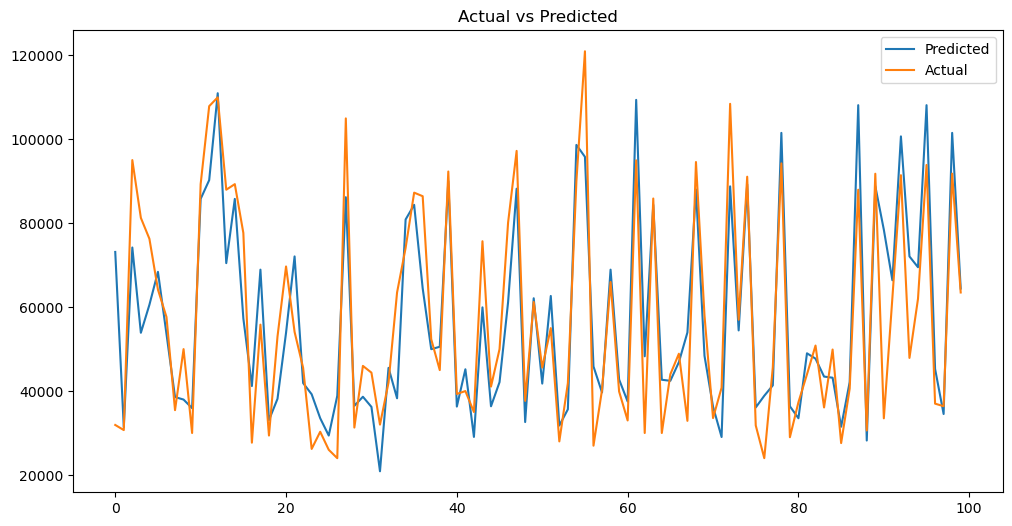

In [10]:
#Liner Regresyon Algoritması
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
#y_predict

lr_mean_absolute_error=mean_absolute_error(y_test, y_predict)
lr_mean_squared_error=mean_squared_error(y_test,y_predict)
lr_r2_score=r2_score(y_test,y_predict)

print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  6676.320768649669
root mean squared error:  11699.913847964499
Coefficient of determination R^2:  0.7539994286815923


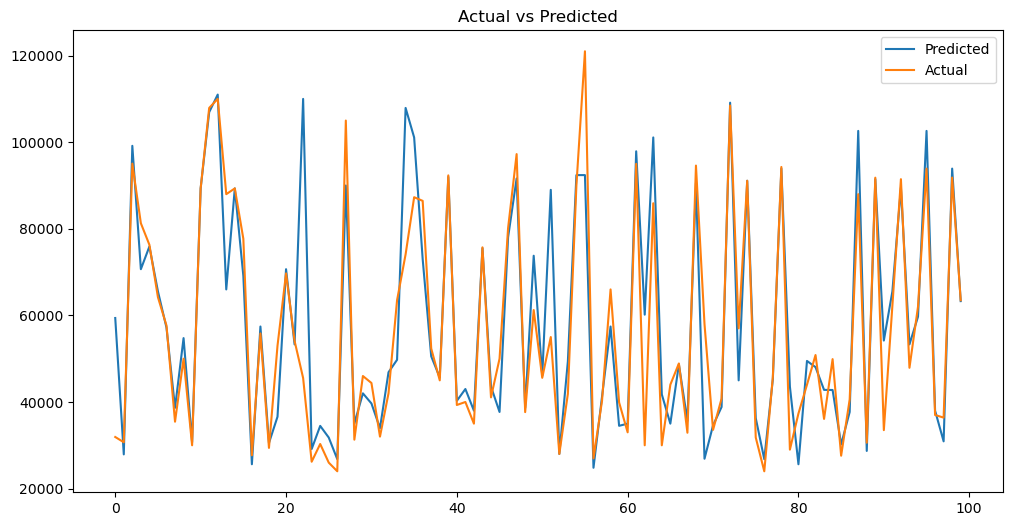

In [11]:
#Karar Ağacı Algoritması
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best')
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)

dt_mean_absolute_error=mean_absolute_error(y_test, y_predict_dt)
dt_mean_squared_error=mean_squared_error(y_test,y_predict_dt)
dt_r2_score=r2_score(y_test,y_predict_dt)

print('mean absolute error: ',mean_absolute_error(y_test, y_predict_dt))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_dt)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_dt))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')
plt.show()

C:\Users\moonm\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.027e+08, tolerance: 3.886e+07
  model = cd_fast.enet_coordinate_descent(


mean absolute error:  9024.369643117692
root mean squared error:  12443.722795380947
Coefficient of determination R^2:  0.7217267604971986


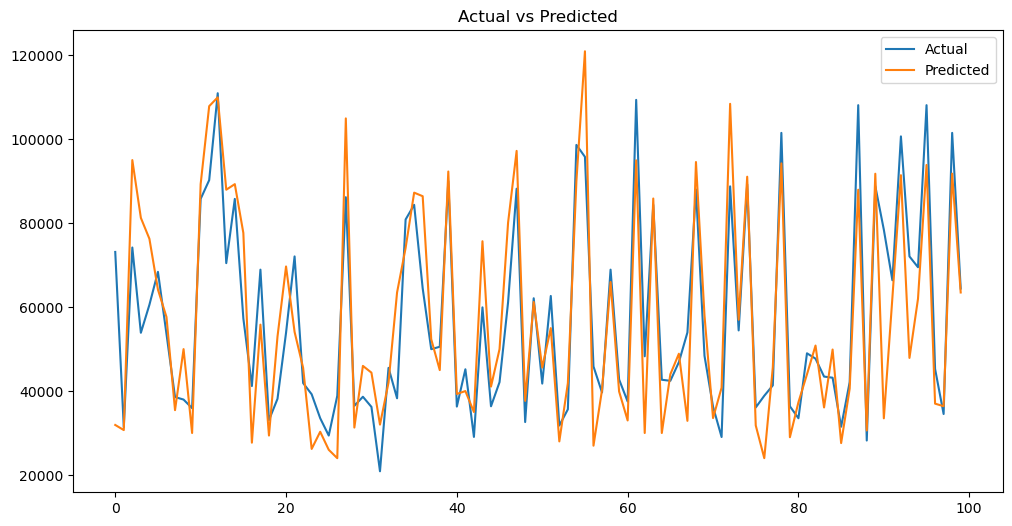

In [12]:
# Lasso Regressyon Algoritması
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 

ls_mean_absolute_error=mean_absolute_error(y_test, y_predict_lasso)
ls_mean_squared_error=mean_squared_error(y_test,y_predict_lasso)
ls_r2_score=r2_score(y_test,y_predict_lasso)

print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))

# Lasso İçin Tahmin Grafiği Çizelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  5297.6352576864765
root mean squared error:  8950.831119897
Coefficient of determination R^2:  0.8560215432156174


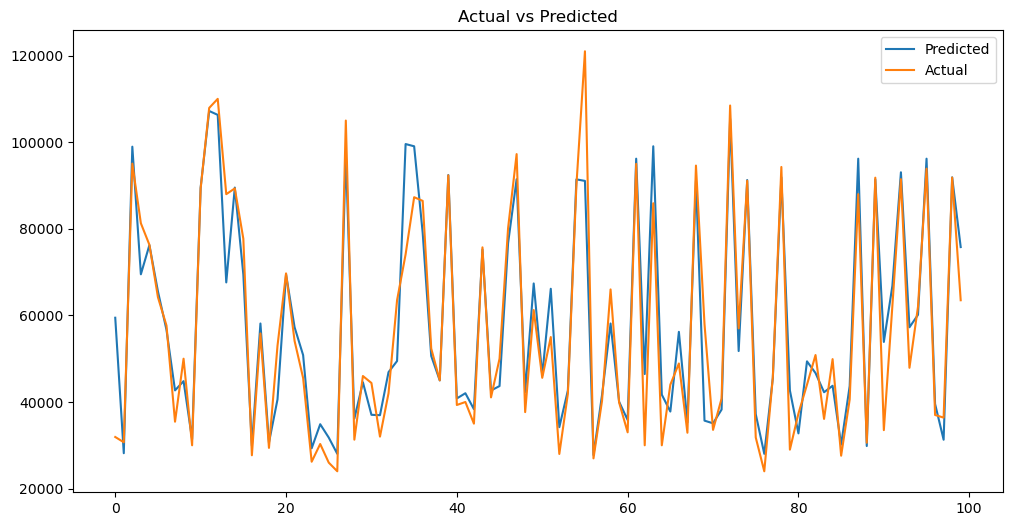

In [13]:
#RandomForest Algoritması
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()#parametre yok 
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)

rf_mean_absolute_error=mean_absolute_error(y_test, y_predict_rf)
rf_mean_squared_error=mean_squared_error(y_test,y_predict_rf)
rf_r2_score=r2_score(y_test,y_predict_rf)

print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')
plt.show()

In [14]:
#RandomForest algoritmasının iyileşmesi için GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_predict_rf_grid = best_rf_model.predict(x_test)

C:\Users\moonm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
186 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moonm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moonm\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\moonm\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\moonm\anaconda3\Lib\site-packa

En iyi parametreler: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


mean absolute error:  5709.007502379636
root mean squared error:  8705.793437191964
Coefficient of determination R^2:  0.863796739243385


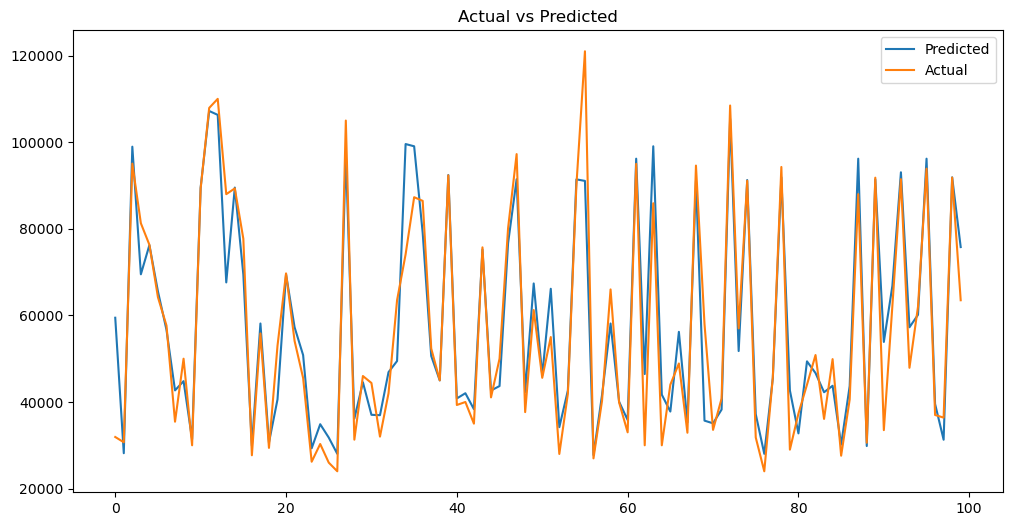

In [15]:
#GridSearch ile mae rmse r^2 değerlerinin değişimi
rfg_mean_absolute_error=mean_absolute_error(y_test, y_predict_rf_grid)
rfg_mean_squared_error=mean_squared_error(y_test, y_predict_rf_grid)
rfg_r2_score=r2_score(y_test, y_predict_rf_grid)

print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf_grid))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf_grid)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf_grid))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error: 18667.896252307135
Root Mean Squared Error: 23446.558562494785
R2 Score: 0.012063566511066104


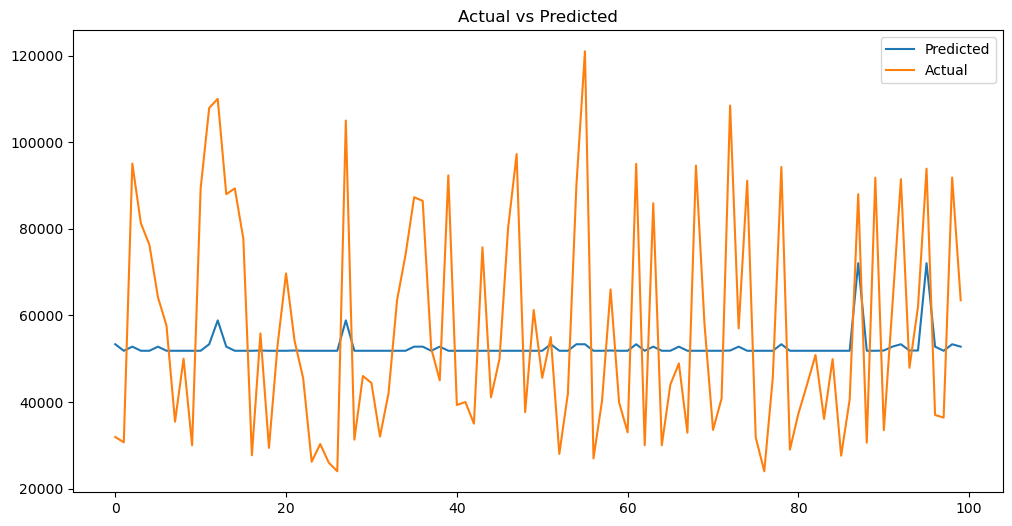

In [16]:
#SVR Algoritması
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5,6,7,8,9,10]  
}
svr = SVR()

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_svr_model = grid_search.best_estimator_
y_predict_svr_best = best_svr_model.predict(x_test)

svr_mean_absolute_error=mean_absolute_error(y_test, y_predict_svr_best)
svr_mean_squared_error=mean_squared_error(y_test, y_predict_svr_best)
svr_r2_score=r2_score(y_test, y_predict_svr_best)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict_svr_best))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict_svr_best)))
print('R2 Score:', r2_score(y_test, y_predict_svr_best))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_svr_best,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')
plt.show()

K-Nearest Neighbors:
mean absolute error:  8518.631603399434
root mean squared error:  12445.277925504342
Coefficient of determination R^2:  0.7216572028341879


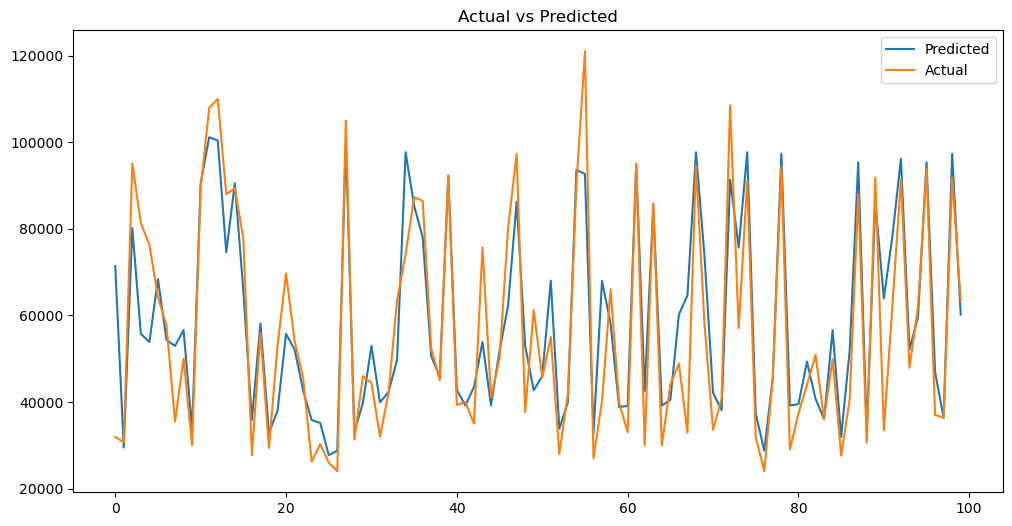

In [17]:
##KNN Algoritması
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_predict_knn = knn.predict(x_test)

knn_mean_absolute_error=mean_absolute_error(y_test, y_predict_knn)
knn_mean_squared_error=mean_squared_error(y_test, y_predict_knn)
knn_r2_score=r2_score(y_test, y_predict_knn)


print('K-Nearest Neighbors:')
print('mean absolute error: ', mean_absolute_error(y_test, y_predict_knn))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_predict_knn)))
print('Coefficient of determination R^2: ', r2_score(y_test, y_predict_knn))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_knn,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  10682.743212149708
root mean squared error:  14068.906219051069
Coefficient of determination R^2:  0.644293781644063


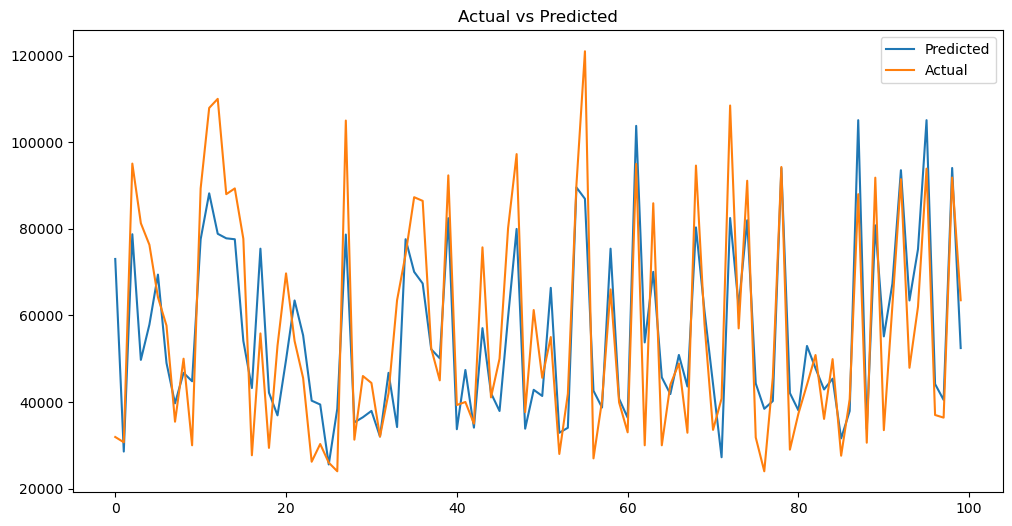

In [18]:
#Elasticnet algoritması
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(x_train, y_train)
y_predict_ela = elastic.predict(x_test)

ela_mean_absolute_error=mean_absolute_error(y_test, y_predict_ela)
ela_mean_squared_error=mean_squared_error(y_test, y_predict_ela)
ela_r2_score=r2_score(y_test, y_predict_ela)

print('mean absolute error: ', mean_absolute_error(y_test, y_predict_ela))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_predict_ela)))
print('Coefficient of determination R^2: ', r2_score(y_test, y_predict_ela))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_ela,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')
plt.show()

In [19]:
#Performansların karşılaştırılması
final_RMSE = pd.DataFrame( data  = [[lr_mean_squared_error, ls_mean_squared_error, dt_mean_squared_error, rf_mean_squared_error,rfg_mean_squared_error,svr_mean_squared_error,knn_mean_squared_error,ela_mean_squared_error],
                                    [lr_r2_score,ls_r2_score,dt_r2_score,rf_r2_score,rfg_r2_score,svr_r2_score,knn_r2_score,ela_r2_score]],
                          columns  = ['Linear Regression','Lasso','Decision Tree Regressor','Random Forest Regressor','Random Forest Regressor GridSearch','Support Vector Regression','K-Nearest Neighbors','ElasticNet Regression'],
                         index =['RMSE','R2'])


final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,154845964.289857,0.721727
Lasso,154846237.008283,0.721727
Decision Tree Regressor,136887984.049791,0.753999
Random Forest Regressor,80117377.736917,0.856022
Random Forest Regressor GridSearch,75790839.371055,0.863797
Support Vector Regression,549741108.424497,0.012064
K-Nearest Neighbors,154884942.643046,0.721657
ElasticNet Regression,197934122.200454,0.644294


In [20]:
#random forest regressor gridsearch algoritması daha iyi sonuçlar verdi

In [22]:
from joblib import dump
dump(best_rf_model, 'best_model.sav')

['best_model.sav']